
# Project 1: Investigate a Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis With Visuals</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In This project we will analyse a movie dataset collected from the movie Database (TMDb) which collects information from over 10 thousand movies

#### Here are its columns:
>'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj

#### Here are the questions we want to answer throughout the analysis
<ol>
 <li>Which Geners are more popular and what is the production industry growth rate through nearly the past two decades?</li>
    <li>What are the properties of movies that has high revenue?</li>
    <li>what geners are more profitable?</li>
</ol>

In [228]:
#import statements for all of the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
%matplotlib inline


df=pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> After gathering the data we assess it and then clean the data to be able to extract information from it

In [229]:
# Load your data and print out a few lines. Perform operations to inspect data
df.shape

(10866, 21)

In [230]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [231]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [232]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [233]:
#check the types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

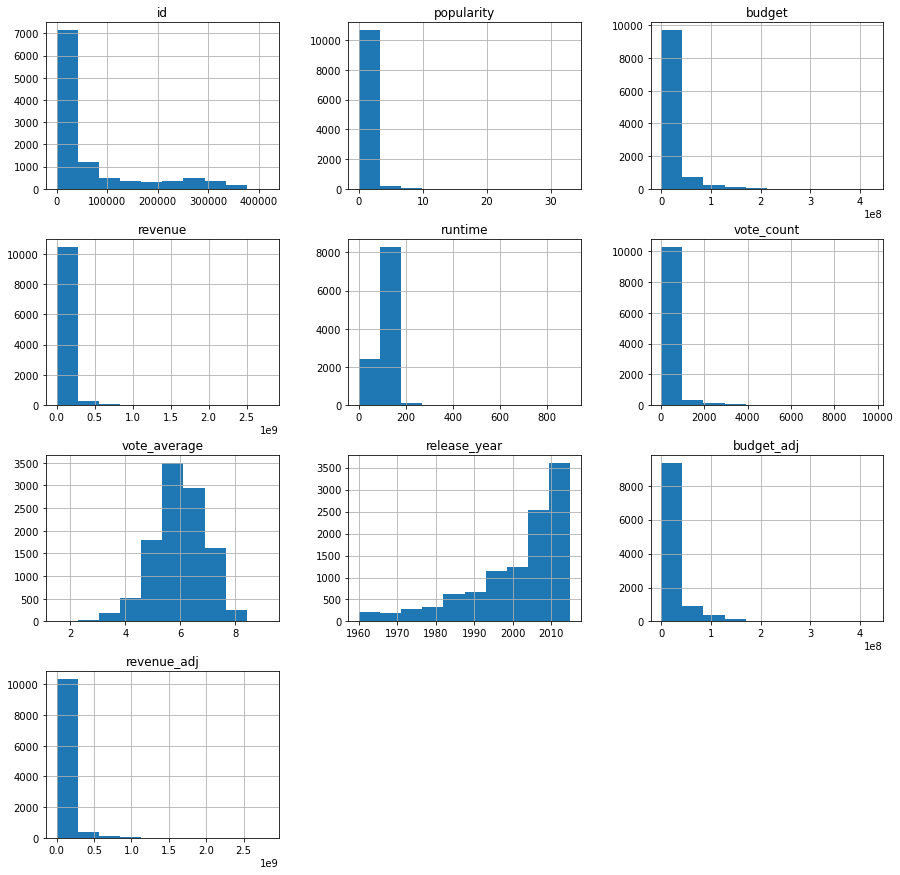

In [234]:
df.hist(figsize=(15,15) );

### Data Cleaning 

<h4>After inspecting the data and structure we will start cleaning the data by removing any uneeded columns, droping any dublicates, fixing datatypes and droping the missing values or substituting them accordingly</h4>


In [235]:
# Drop unwanted columns
df.drop(['imdb_id','budget','revenue','original_title','cast','homepage','director','tagline','keywords','overview','vote_average'
        ,'vote_count'], axis=1 ,inplace=True)

In [236]:
# check for duplicates

df.duplicated().sum()

1

In [237]:
df[df.duplicated()]

id  popularity  runtime                                       genres  \
2090  42194     0.59643       92  Crime|Drama|Action|Thriller|Science Fiction   

        production_companies release_date  release_year  budget_adj  \
2090  Namco|Light Song Films      3/20/10          2010  30000000.0   

      revenue_adj  
2090     967000.0

In [238]:
df.drop_duplicates(inplace=True)

In [239]:
df.duplicated().sum()

0

In [240]:
# check if there are any columns with missing values
df.columns[df.isnull().any()]

Index(['genres', 'production_companies'], dtype='object')

In [241]:
#check all the rows with the missing data according to the columns
geners_na_rows= len(df.genres[df['genres'].isnull()])
prodc_na_rows=len(df.production_companies[df['production_companies'].isnull()])
print(f'geners missing rows ={geners_na_rows} ,production companies miisng rows={prodc_na_rows} ')

geners missing rows =23 ,production companies miisng rows=1030 


In [242]:
#due to most of the production companies rows being missing we will drop the production_companies column
df.drop(['production_companies'], axis=1 ,inplace=True)

In [243]:
#get the median of geners to replace the missing string
median_genre= df["genres"].value_counts().idxmax()
median_genre

'Drama'

In [244]:
#fill in the missing genre with the median and check to see if there is no more missing data
df['genres'].fillna(median_genre, inplace=True)
df.isnull().sum().any()

False

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   runtime       10865 non-null  int64  
 3   genres        10865 non-null  object 
 4   release_date  10865 non-null  object 
 5   release_year  10865 non-null  int64  
 6   budget_adj    10865 non-null  float64
 7   revenue_adj   10865 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 763.9+ KB


In [246]:
#fix data types by changing relase_date and year to date format and spliting the genres to diffrent rows
df['release_date']=pd.to_datetime(df['release_date'])
df['release_year']=pd.to_datetime(df['release_year'])

In [247]:
#we will check the relase date data
df['release_year'].dt.to_period("Y").nunique()

1

In [248]:
df['release_year'].dt.to_period("Y").unique()

<PeriodArray>
['1970']
Length: 1, dtype: period[A-DEC]

<h4>Since the release_year data seems to be incorrect it only has one year in all rows we will now Drop its column</h4>

In [249]:
df.drop(['release_year'], axis=1 ,inplace=True)

In [250]:
df['release_date'].unique()

array(['2015-06-09T00:00:00.000000000', '2015-05-13T00:00:00.000000000',
       '2015-03-18T00:00:00.000000000', ...,
       '2066-12-21T00:00:00.000000000', '2066-11-02T00:00:00.000000000',
       '2066-11-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [251]:
#we will now also drop any value of date greate than year 2021
to_drop=df.query('release_date > 2021').index
df.drop(index=to_drop, axis=1 ,inplace=True)

In [252]:
df['release_date'].unique()

array(['2015-06-09T00:00:00.000000000', '2015-05-13T00:00:00.000000000',
       '2015-03-18T00:00:00.000000000', ...,
       '1978-02-15T00:00:00.000000000', '1978-05-01T00:00:00.000000000',
       '1978-07-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10819
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10462 non-null  int64         
 1   popularity    10462 non-null  float64       
 2   runtime       10462 non-null  int64         
 3   genres        10462 non-null  object        
 4   release_date  10462 non-null  datetime64[ns]
 5   budget_adj    10462 non-null  float64       
 6   revenue_adj   10462 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 653.9+ KB


#### Now we want to split the genres in the genres column so that each specific genres would have a new row which will help us to extract information from our dataset so lets crete a function to do so and make it generic so that we can use it again if needed 

In [254]:
def seperate_by (column_name,Split_by,df_v1):
    #to split the string and assign
    df_v1 = df_v1.assign(genres=df_v1[column_name].str.split(Split_by))
    #add the new rows and reindex
    df_v1=df_v1.explode(column_name).reset_index().reindex(df.columns, axis=1)
    #then we return or modified dataframe
    df_v2=df_v1.copy()
    return df_v1
    

In [255]:

df = seperate_by('genres','|',df)
df

id  popularity  runtime           genres release_date  \
0      135397   32.985763      124           Action   2015-06-09   
1      135397   32.985763      124        Adventure   2015-06-09   
2      135397   32.985763      124  Science Fiction   2015-06-09   
3      135397   32.985763      124         Thriller   2015-06-09   
4       76341   28.419936      120           Action   2015-05-13   
...       ...         ...      ...              ...          ...   
25945   39995    0.047645       92           Horror   1978-10-14   
25946   39995    0.047645       92         Thriller   1978-10-14   
25947   39995    0.047645       92          Mystery   1978-10-14   
25948   16214    0.044675      107           Action   1978-07-28   
25949   16214    0.044675      107           Comedy   1978-07-28   

         budget_adj   revenue_adj  
0      1.379999e+08  1.392446e+09  
1      1.379999e+08  1.392446e+09  
2      1.379999e+08  1.392446e+09  
3      1.379999e+08  1.392446e+09  
4      1.379999e+08  3.481613e+08  
...             ...           ...  
25945  0.000000e+00  0.000000e+00  
25946  0.000000e+00  0.000000e+00  
25947  0.000000e+00  0.000000e+00  
25948  0.000000e+00  2.607307e+08  
25949  0.000000e+00  2.607307e+08  

[25950 rows x 7 columns]

<a id='eda'></a>
## Exploratory Data Analysis



### lets explore our data after cleaning with the histogram graphs first

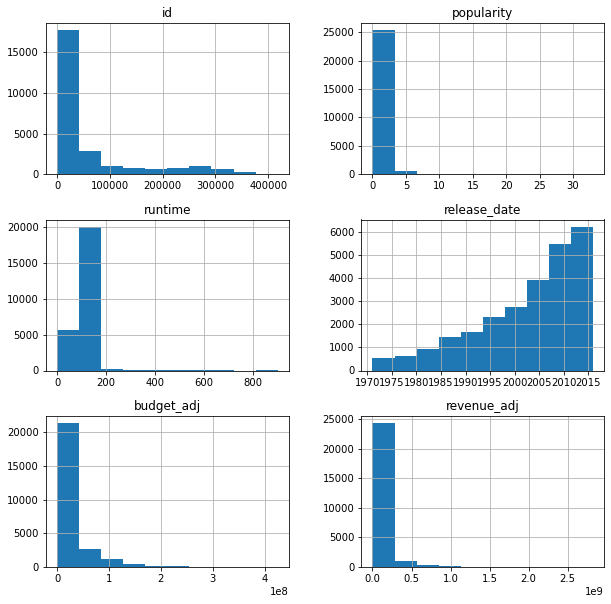

In [256]:
df.hist(figsize=(10, 10));

### then lets explore our data after cleaning with the scatter plot graphs

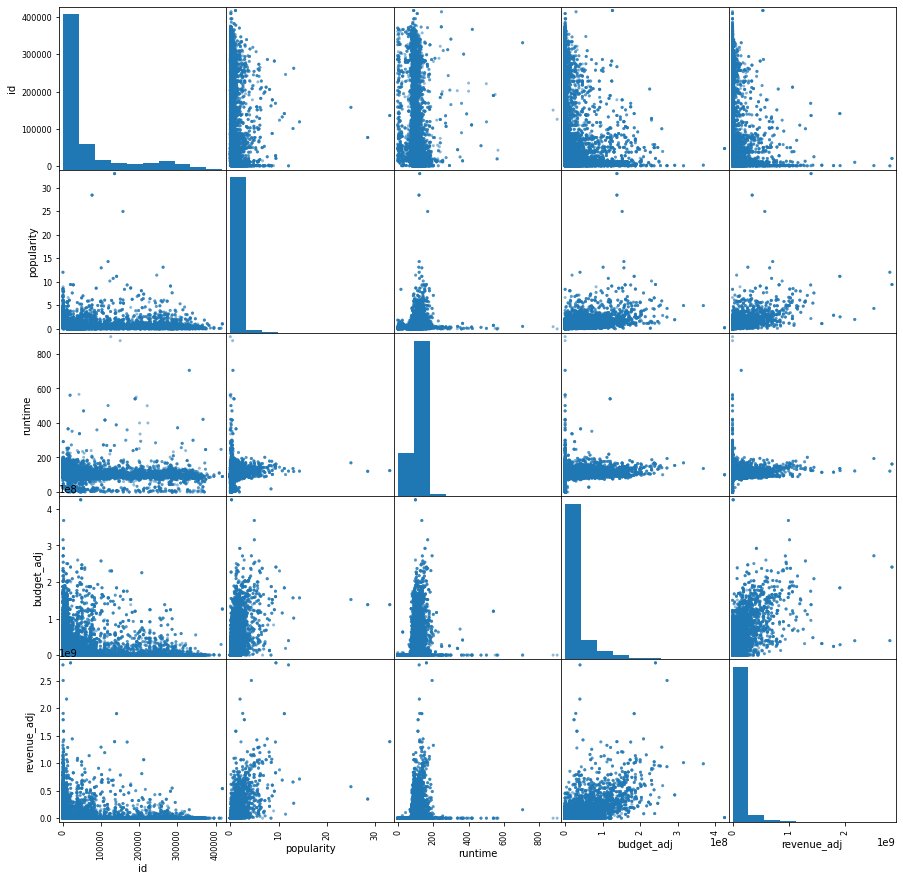

In [257]:
pd.plotting.scatter_matrix(df,figsize=(15, 15));

In [258]:
#investigate.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25950 entries, 0 to 25949
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            25950 non-null  int64         
 1   popularity    25950 non-null  float64       
 2   runtime       25950 non-null  int64         
 3   genres        25950 non-null  object        
 4   release_date  25950 non-null  datetime64[ns]
 5   budget_adj    25950 non-null  float64       
 6   revenue_adj   25950 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.4+ MB


### Research Question 1: Which Geners are more popular and what is the production industry growth rate through nearly the past two decades?

#### Firstly, lets's get the total count of each genre in ascending order

In [259]:
df['genres'].value_counts(ascending=True)

Western             121
TV Movie            164
Foreign             178
War                 234
History             300
Music               383
Documentary         515
Animation           681
Mystery             775
Fantasy             890
Family             1189
Science Fiction    1192
Crime              1307
Adventure          1401
Horror             1585
Romance            1639
Action             2295
Thriller           2838
Comedy             3668
Drama              4595
Name: genres, dtype: int64

#### Secondly, lets's get the total count of each genre in ascending order per each five years starting from 2000 to 2015

In [260]:
first_5_years= df.query('release_date >2000  & release_date < 2005')['genres'].value_counts(ascending=True)
second_5_years=df.query('release_date >2005  & release_date < 2010')['genres'].value_counts(ascending=True)
third_5_years=df.query('release_date >2010  & release_date < 2015')['genres'].value_counts(ascending=True)

#### Now lets plot barh chart of each geners values count to compare the frequencies of each genre per five years to understand which kind of genre has more demand thus being more popular

##### Here is the genres values count (frequencies) from year 2000 to 2005

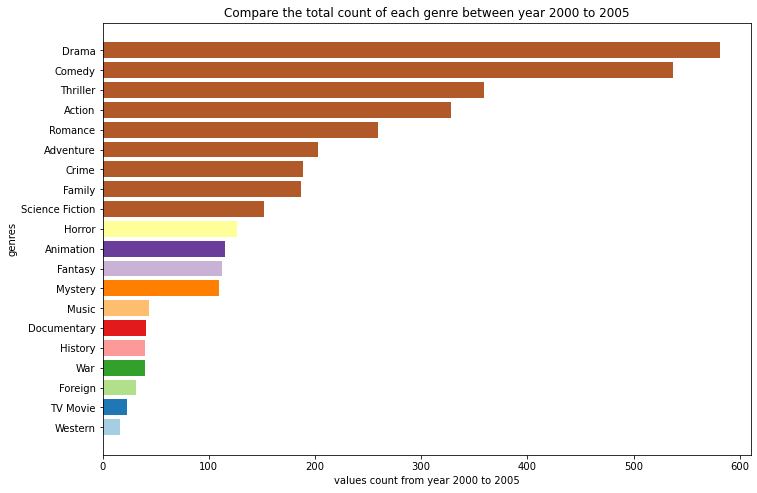

In [261]:
plt.figure().add_axes([0,0,1.5,1.5])
plt.xlabel("values count from year 2000 to 2005")
plt.ylabel("genres")
plt.title("Compare the total count of each genre between year 2000 to 2005")
plt.barh(first_5_years.index,first_5_years, color=plt.cm.Paired(np.arange(len(df))));

##### Here is the genres values count (frequencies) from year 2005 to 2010

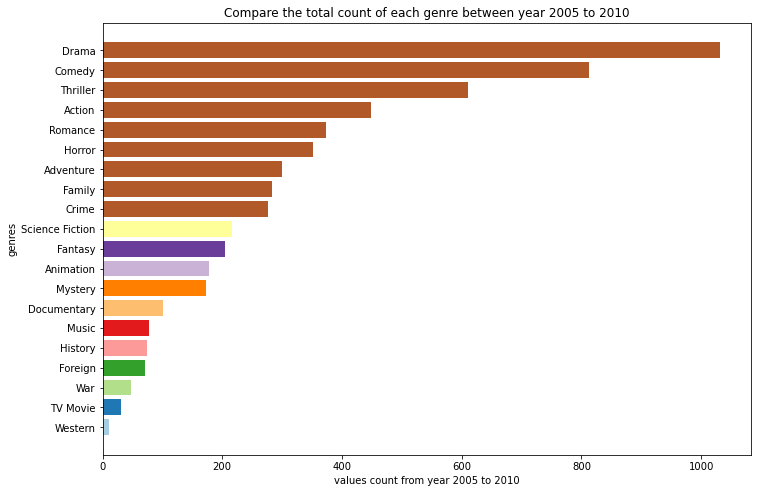

In [262]:
plt.figure().add_axes([0,0,1.5,1.5])
plt.xlabel("values count from year 2005 to 2010")
plt.ylabel("genres")
plt.title("Compare the total count of each genre between year 2005 to 2010")
plt.barh(second_5_years.index,second_5_years ,color=plt.cm.Paired(np.arange(len(df))));

#### Here is the genres values count (frequencies) from year 2010 to 2015

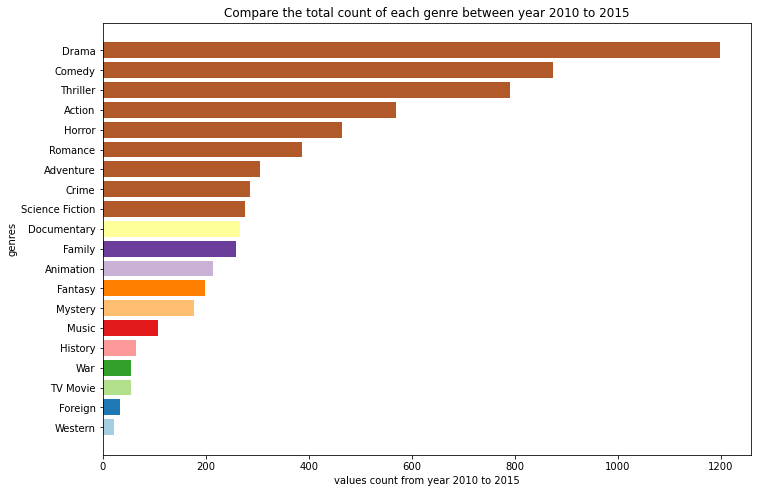

In [263]:
plt.figure().add_axes([0,0,1.5,1.5])
plt.xlabel("values count from year 2010 to 2015")
plt.ylabel("genres")
plt.title("Compare the total count of each genre between year 2010 to 2015")
plt.barh(third_5_years.index,third_5_years, color=plt.cm.Paired(np.arange(len(df))));

### We can see from the digrams that the Most loved genre through the past years from 2000 to 2015 has been Drama Then comedy, thriller, action and so on 
### We also notice that the number of movies has been increasing gradually per each 5 years

#### Now lets calculate the precentage growth in movies per each 5 year from 2000 to 2015

In [264]:

first_5_years= df.query('release_date >2000  & release_date < 2005')
second_5_years=df.query('release_date >2005  & release_date < 2010')
third_5_years=df.query('release_date >2010  & release_date < 2015')


first_precentage_increase=( (len(second_5_years)-len(first_5_years) )/len(first_5_years))*100
second_precentage_increase=((len(third_5_years)-len(second_5_years))/len(second_5_years))*100


### Now lets print the precentage of growth of the production indestry per each 5 years gradually for past years from 2000  to 2015

In [265]:
print(f"""Growth Precentage From year 2005 to 2010 =  {'{:.2f}'.format(first_precentage_increase)}%  
Growth Precentage From year 2010 to 2015 = {'{:.2f}'.format(second_precentage_increase)}%""")

Growth Precentage From year 2005 to 2010 =  62.22%  
Growth Precentage From year 2010 to 2015 = 16.51%


#### Result: we can see that the movies producation indstry has been expanding through each passing year with a remarkble growth precentage bwteen  year 2005 and 2010

### Research Question 2  What are the properties of movies that has high revenue?

#### lets statrt by checking the revenue agnist each column with a number that might affect the revenue in a scatter plot grah

#### This scatter plot grah checks the revenue agnist the budget

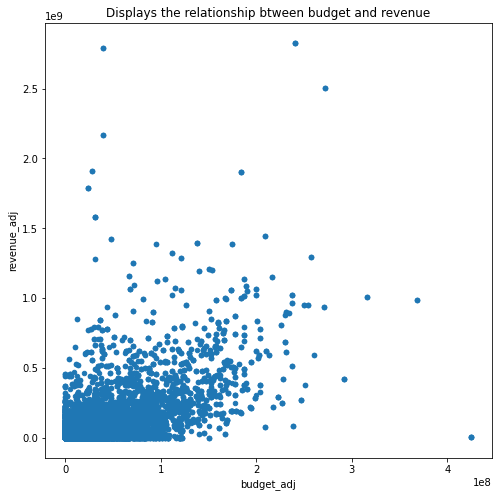

In [266]:
df.plot(kind='scatter',x='budget_adj',y='revenue_adj'
        ,title="Displays the relationship btween budget and revenue" ,figsize=(8,8));

#### This scatter plot grah checks the revenue agnist the relase_date

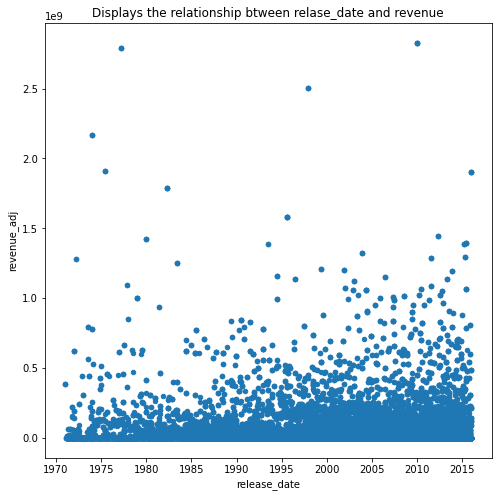

In [267]:
#lets check the revenue agnist the relase_date
df.plot(kind='scatter',x='release_date',y='revenue_adj'
        ,title="Displays the relationship btween relase_date and revenue",figsize=(8,8));

#### This scatter plot grah checks the revenue agnist the popularity

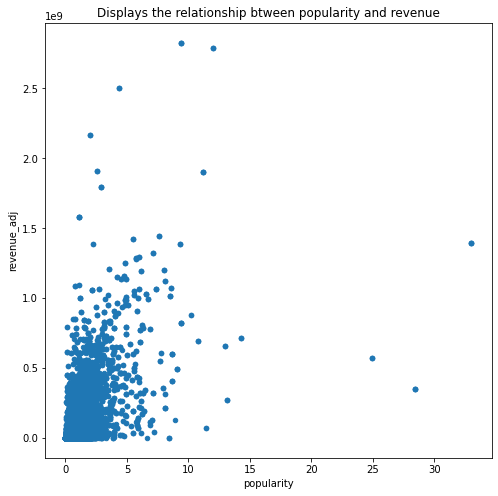

In [268]:
#lets check the revenue agnist the popularity
df.plot(kind='scatter',x='popularity',y='revenue_adj' 
        ,title="Displays the relationship btween popularity and revenue",figsize=(8,8));

#### This scatter plot grah checks the revenue agnist the runtime

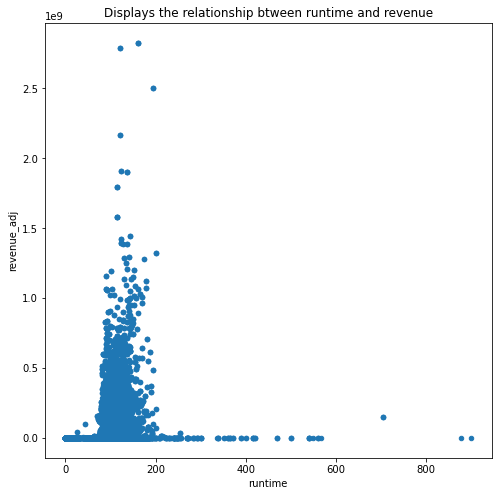

In [269]:
#lets check the revenue agnist the runtime
df.plot(kind='scatter',x='runtime',y='revenue_adj' 
        ,title="Displays the relationship btween runtime and revenue",figsize=(8,8));

In [270]:
df.describe()

id    popularity       runtime    budget_adj   revenue_adj
count   25950.000000  25950.000000  25950.000000  2.595000e+04  2.595000e+04
mean    60436.969865      0.715657    102.265241  2.128478e+07  6.037851e+07
std     88048.231287      1.130570     30.207925  3.842528e+07  1.595277e+08
min         5.000000      0.000065      0.000000  0.000000e+00  0.000000e+00
25%     10269.500000      0.227137     90.000000  0.000000e+00  0.000000e+00
50%     18474.000000      0.417625     99.000000  1.141022e+05  0.000000e+00
75%     62527.000000      0.786396    112.000000  2.757252e+07  4.432932e+07
max    417859.000000     32.985763    900.000000  4.250000e+08  2.827124e+09

#### Result: We can Observe that the budget has week coorelation with revenue While  runtime and popularity have a higer correlation with revenue
#### Now lets remove some of the outliers from popurality and runtime to get a more accurate visual of thier relationship with revenue


In [271]:
pop_rev = df.query("popularity < 7")
run_rev = df.query("runtime < 220")

#### lets check the revenue agnist the adjusted popularity with a scatter plot graph

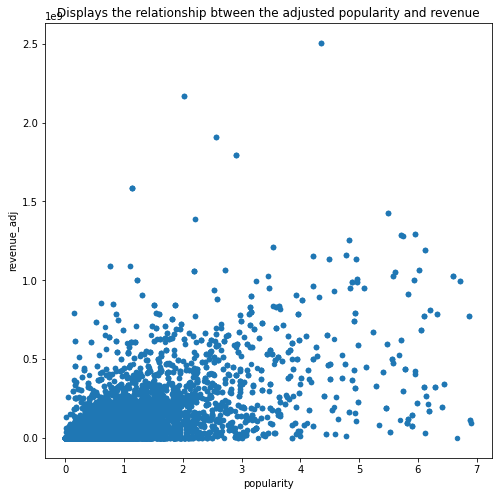

In [272]:

pop_rev.plot(kind='scatter',x='popularity',y='revenue_adj'
             ,title="Displays the relationship btween the adjusted popularity and revenue",figsize=(8,8));

#### Result: We can see now more clearly that the revenue gets higer as the popularity increase where the best values with revenue are betwen popularity values of 3 and 7

#### Then lets check the revenue agnist the adjusted runtime

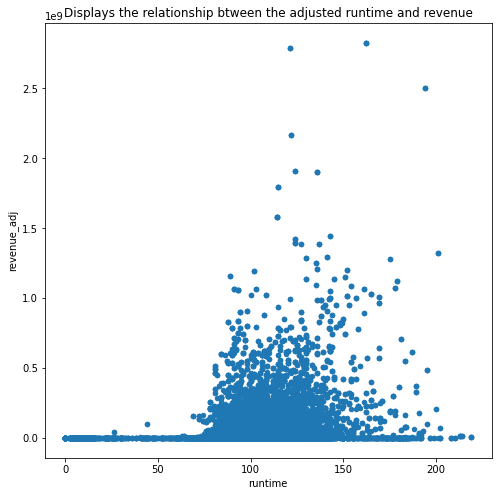

In [273]:

run_rev.plot(kind='scatter',x='runtime',y='revenue_adj' 
             ,title="Displays the relationship btween the adjusted runtime and revenue",figsize=(8,8));

#### Result: it apperas that the revenue is the highest when the movie run time is between 100 and 150 whic is very close to mean runtime of an avegrage movie whic is 102


### Research Question 3  what geners are more profitable?


#### now lest create the profit column by subtracting the budget from the revenue

In [274]:

df['profit']=df.revenue_adj-df.budget_adj

#### lets check each genres agnist the profit


In [275]:

df_01 =  df.groupby('genres')['profit'].sum()
print(df_01)

genres
Action             1.346035e+11
Adventure          1.349455e+11
Animation          3.875943e+10
Comedy             1.164437e+11
Crime              4.573638e+10
Documentary        8.501937e+08
Drama              1.116360e+11
Family             6.953244e+10
Fantasy            6.706258e+10
Foreign            2.857549e+07
History            5.466626e+09
Horror             2.622266e+10
Music              1.099643e+10
Mystery            2.445620e+10
Romance            5.084859e+10
Science Fiction    7.005346e+10
TV Movie           8.953509e+06
Thriller           9.555413e+10
War                8.771557e+09
Western            2.505584e+09
Name: profit, dtype: float64


#### Now we will use a pie chart to further explain the relationship between each genre agnist the profit


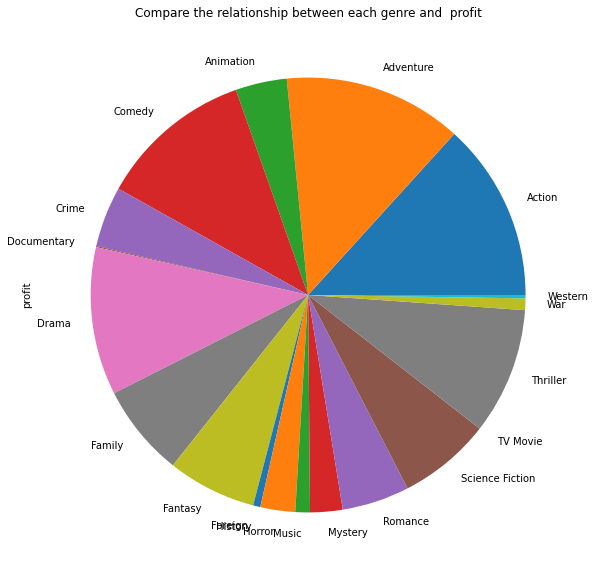

In [276]:
df_01.plot(kind='pie',figsize=(10, 10) , title="Compare the relationship between each genre and  profit");

#### Now we will use a barh chart to further explain the relationship between each genre agnist the profit

<BarContainer object of 20 artists>

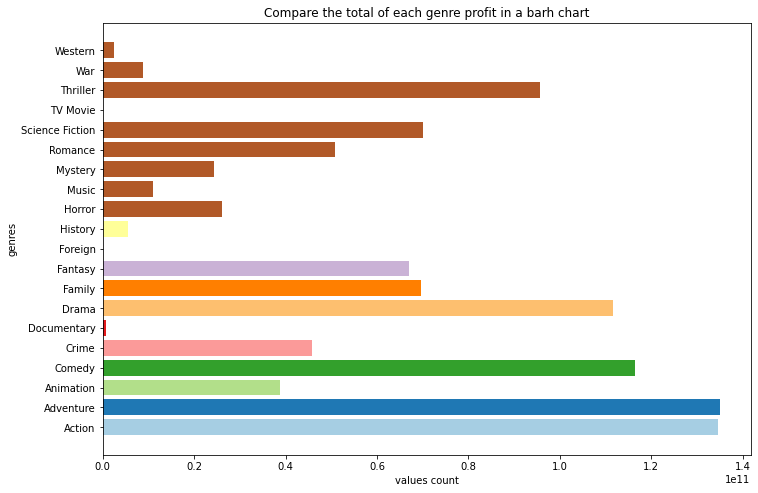

In [277]:
plt.figure().add_axes([0,0,1.5,1.5])
plt.xlabel("values count")
plt.ylabel("genres")
plt.title("Compare the total of each genre profit in a barh chart")
plt.barh(df_01.index, df_01, color=plt.cm.Paired(np.arange(len(df_01))))

### We can clearly see that Adventure and Action Movies have the highest revenue

<a id='conclusions'></a>
## Conclusions
### Q1:Which Geners are more popular and what is the production industry growth rate through nearly the past two decades? (2000 to 2015)
<ul>
   <li>the Most loved genre through the past years from 2000 to 2015 has been Drama Then comedy, thriller, action and so on</li>
   <li>We also notice that the number of movies has been increasing gradually each 5 years where it increased by 62% from the amount of movies made between years [2000-2005] to [2005-2010]. Then it also increased by 16% from the amount of movies made between year [2005-2010] to [2010-2015] </li>
    <li>The remarkble growth rate 62% in the Movie production industry that we observed is related to multibale causes and one of them is video on-demand — renting and buying movies through cable subscriptions which also affected the DVD industry negatively </li>
    </ul>
    
### Q1:What are the properties of movies that has high revenue??
   <li>As its popularity increases the revanue should increase, Therefore revenue and popularity have positive correlation</li>
   <li>By keeping the runtime between 100 to 150 mins the revune would increase</li>
   
### Q1:what geners are more profitable?
   <li>Adventure and Action Movies have made the highest profit</li>

## Limitations

<ol>
    <li>I iniatially wanted to use the production companies column aganist the profit column to get the production company with the highest profit but the production companies column had 1030 missing rows from a dataset with a total of 10866 rows which was too much to drop as it will affect my Exploratory section and I couldn't replace the missing with the medium or mean as I thought it wouldent be too accurate. Thus I elected to remove the production companies column and contiue without it</li>
    <li>There weren't many obstacles with such a clean dataset but the genres had 23 missing rows which I was able to replace with the medium value  </li>
    </ol>